# Scikit-learn
1) 데이터 전처리
    - MinMax Scaler
        - fit()
        - transform()
2) KNN Classifier
    - fit()
    - score()
    - predict() #새 값 예측


---

# KNN Iris Binary Classification(2진분류)

### 데이터 준비

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
df = pd.read_csv('iris.csv')
df.shape

(150, 6)

In [294]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [295]:
df = df.drop(["Id"], axis=1).copy()

In [296]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [297]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [298]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [299]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [300]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [301]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [302]:
df['species'] = df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1, 
    'Iris-virginica':2
}) 
# map은 컬럼 하나에만 적용가능

In [303]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [304]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [305]:
# 데이터프레임(행렬)일 때는 대문자
X = df.iloc[:, :4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [306]:
# 시리즈일 때는 소문자
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [307]:
X = df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [308]:
X.shape, y.shape

((150, 4), (150,))

### TEST DATA Seperation

In [309]:
# 8:2

In [310]:
# !pip install scikit-learn

In [311]:
from sklearn.utils import shuffle

In [312]:
X, y = shuffle(X,y)
X.head(), y.head()

(     sepal_length  sepal_width  petal_length  petal_width
 20            5.4          3.4           1.7          0.2
 89            5.5          2.5           4.0          1.3
 128           6.4          2.8           5.6          2.1
 83            6.0          2.7           5.1          1.6
 22            4.6          3.6           1.0          0.2,
 20     0
 89     1
 128    2
 83     1
 22     0
 Name: species, dtype: int64)

In [313]:
X_train = X.iloc[:120,:]
X_test = X.iloc[120:,:]
y_train = y.iloc[:120]
y_test = y.iloc[120:]

print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 정규화
- Min Max Scaler
- 표준화

![](https://miro.medium.com/max/512/1*Ap_7t_-luGSaAVgc7kl7qA.png)

In [314]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
20,5.4,3.4,1.7,0.2
89,5.5,2.5,4.0,1.3
128,6.4,2.8,5.6,2.1
83,6.0,2.7,5.1,1.6
22,4.6,3.6,1.0,0.2


In [315]:
for col in X.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col]-mu)/std
X_train


C:\Users\023\AppData\Local\Temp\ipykernel_1336\1613910536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std


,sepal_length,sepal_width,petal_length,petal_width
20,-0.500688,0.884855,-1.191160,-1.337566
89,-0.379554,-1.201703,0.125461,0.128869
128,0.710654,-0.506184,1.041371,1.195367
83,0.226117,-0.738023,0.755149,0.528805
22,-1.469761,1.348535,-1.591871,-1.337566
...,...,...,...,...
66,-0.258420,-0.042504,0.411683,0.395493
109,1.679727,1.348535,1.327593,1.728616
132,0.710654,-0.506184,1.041371,1.328679
139,1.316325,0.189336,0.926882,1.195367


In [316]:
mu = X_train['sepal_length'].mean()
std = X_train['sepal_length'].std()
mu, std

(-1.4802973661668753e-16, 1.0)

In [317]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,-1.480297e-16,1.0,-1.833164,-0.864090,-0.076718,0.589520,2.527666
sepal_width,120.0,5.699145e-16,1.0,-2.360902,-0.738023,-0.042504,0.653015,3.203253
petal_length,120.0,3.330669e-17,1.0,-1.591871,-1.248405,0.297194,0.755149,1.785548
petal_width,120.0,-4.440892e-17,1.0,-1.470879,-1.204254,0.128869,0.795430,1.728616


In [318]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [319]:
X_train = X_train.values
y_train = y_train.values

### 테스트 데이터

In [320]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

### 데이터 전처리 함수

In [337]:
def get_iris(mode = None):
    df = pd.read_csv('iris.csv')
    df = df.drop(["Id"], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
    
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
        
    df['species'] = df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1, 
    'Iris-virginica':2
    }) 
    df = df.loc[df['species'] < 2, :]
    
    X = df.iloc[:, :4]
    y = df.iloc[:,-1]
    
    X, y = shuffle(X,y, random_state=2022)
    num = int(len(y)*0.8)
    X_train = X.iloc[:num,:]
    X_test = X.iloc[num:,:]
    y_train = y.iloc[:num]
    y_test = y.iloc[num:]
    
    for col in X.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col]-mu)/std
        X_test[col] = (X_test[col]-mu)/std
    
    return X_train, X_test, y_train, y_test
    

In [338]:
X_train, X_test, y_train, y_test = get_iris('bin')


print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


C:\Users\023\AppData\Local\Temp\ipykernel_1336\1156031894.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col]-mu)/std
C:\Users\023\AppData\Local\Temp\ipykernel_1336\1156031894.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = (X_test[col]-mu)/std


In [339]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [340]:
from sklearn.neighbors import KNeighborsClassifier

In [341]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

### 평가

In [342]:
# 테스트
clf.score(X_test, y_test)

1.0

In [343]:
clf.score(X_train, y_train)

1.0

In [344]:
# 예측
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [345]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [346]:
#y_pred, y_test 정확도 계산

In [347]:
(y_pred == y_test).sum()/len(y_test)

1.0

In [348]:
#평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
#acc 정확성
#pre 정밀성
#rec 재현률

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)
    
print_score(y_test, y_pred)

accuracy: 1.0
precision: 1.0
recall: 1.0


### 혼동행렬 (Confusion Matrix)

In [349]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm 

array([[13,  0],
       [ 0,  7]], dtype=int64)

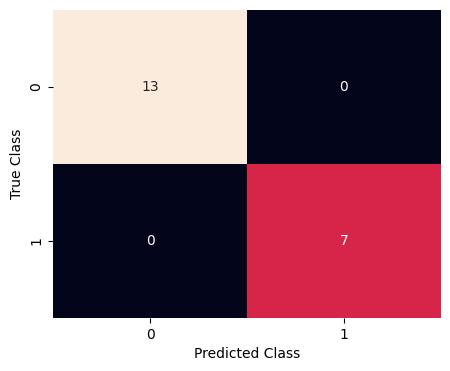

In [350]:
plt.figure(figsize=(5,4))
sns.heatmap(cfm, annot =True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()